In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [4]:
import sys
sys.path.append("../../../") 

from utils.paths import make_dir_line

modality = 'c'
project = 'Streamlined Data Ingestion with pandas'
data = make_dir_line(modality, project)

raw = data('raw')

# 14.2.0 Importing Data From Excel Files

## 14.2.2 Get data from a spreadsheet

In [5]:
# Load pandas as pd
# import pandas as pd

# Read spreadsheet and assign it to survey_responses
survey_responses = pd.read_excel(raw / "fcc_survey.xlsx")

# View the head of the dataframe
print(survey_responses.head())

    Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
0  28.0               0.0             NaN                NaN          NaN   
1  22.0               0.0             NaN                NaN          NaN   
2  19.0               0.0             NaN                NaN          NaN   
3  26.0               0.0             NaN                NaN          NaN   
4  20.0               0.0             NaN                NaN          NaN   

   BootcampRecommend  ChildrenNumber                 CityPopulation  \
0                NaN             NaN  between 100,000 and 1 million   
1                NaN             NaN  between 100,000 and 1 million   
2                NaN             NaN            more than 1 million   
3                NaN             NaN            more than 1 million   
4                NaN             NaN  between 100,000 and 1 million   

   CodeEventConferences  CodeEventDjangoGirls  CodeEventGameJam  \
0                   NaN                   N

## 14.2.3 Load a portion of a spreadsheet

In [6]:
# Create string of lettered columns to load
col_string = "AD,AW:BA"

# Load data with skiprows and usecols set
survey_responses = pd.read_excel(raw / "fcc-new-coder-survey.xlsx", 
                        skiprows=2,
                        usecols=col_string)

# View the names of the columns selected
print(survey_responses.columns)

Index(['ExpectedEarning', 'JobApplyWhen', 'JobPref', 'JobRelocateYesNo',
       'JobRoleInterest', 'JobWherePref'],
      dtype='object')


## 14.2.5 Select a single sheet

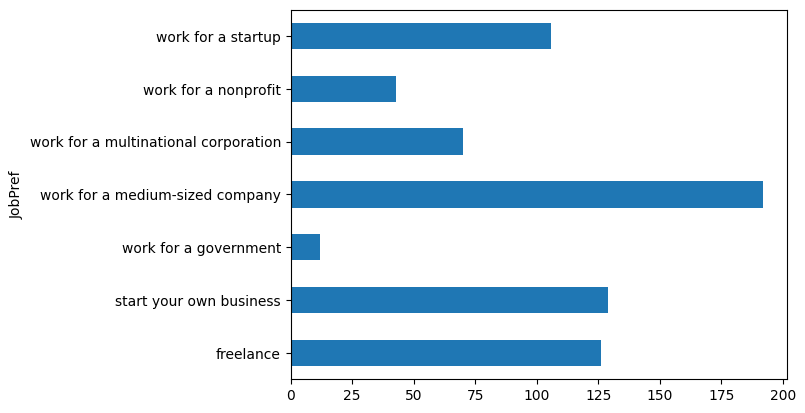

In [16]:
# Create df from second worksheet by referencing its position
responses_2017 = pd.read_excel(raw / "fcc_survey.xlsx",
                               sheet_name=1)

# Graph where people would like to get a developer job
job_prefs = responses_2017.groupby("JobPref").JobPref.count()
job_prefs.plot.barh()
plt.show()

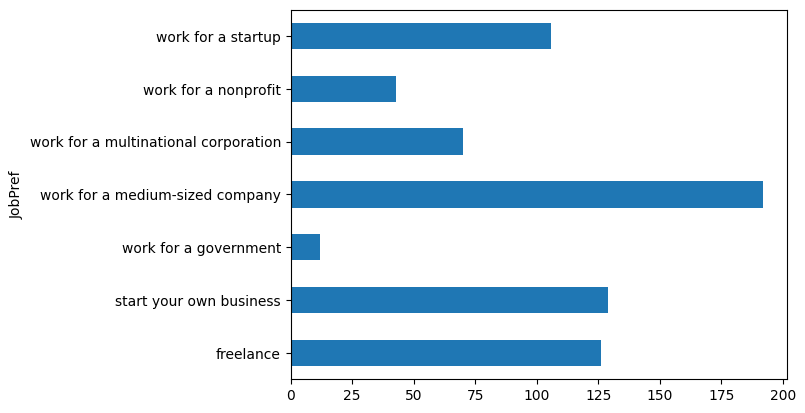

In [21]:
# Create df from second worksheet by referencing its name
responses_2017 = pd.read_excel(raw / "fcc_survey.xlsx",
                               sheet_name='2017')

# Graph where people would like to get a developer job
job_prefs = responses_2017.groupby("JobPref").JobPref.count()
job_prefs.plot.barh()
plt.show()

## 14.2.6 Select multiple sheets

In [22]:
# Load both the 2016 and 2017 sheets by name
all_survey_data = pd.read_excel(raw / "fcc_survey.xlsx",
                                sheet_name=['2016', '2017'])

# View the data type of all_survey_data
print(type(all_survey_data))

<class 'dict'>


In [23]:
# Load all sheets in the Excel file
all_survey_data = pd.read_excel(raw / "fcc_survey.xlsx",
                                sheet_name=[0, '2017'])

# View the sheet names in all_survey_data
print(all_survey_data.keys())

dict_keys([0, '2017'])


In [25]:
# Load all sheets in the Excel file
all_survey_data = pd.read_excel(raw / "fcc_survey.xlsx",
                                sheet_name=None)

# View the sheet names in all_survey_data
print(all_survey_data.keys())

dict_keys(['2016', '2017'])


## 14.2.7 Work with multiple spreadsheets

In [28]:
responses = all_survey_data.copy()

Adding 1000 rows
Adding 1000 rows


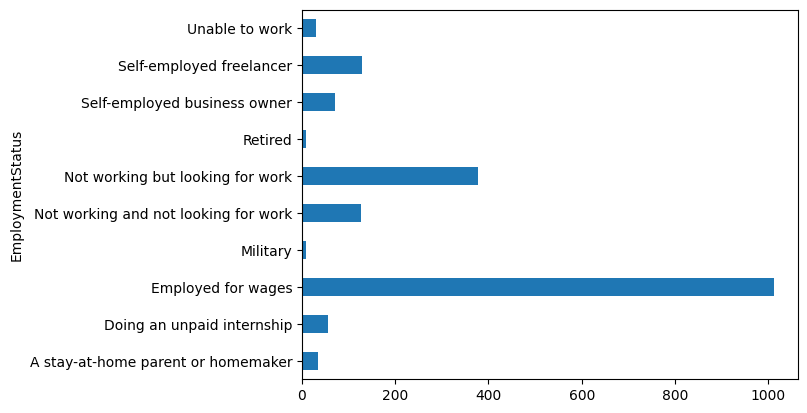

In [32]:
# Create an empty dataframe
all_responses = pd.DataFrame()

# Set up for loop to iterate through values in responses
for df in responses.values():
  # Print the number of rows being added
  print("Adding {} rows".format(df.shape[0]))
  # Append df to all_responses, assign result
  # all_responses = all_responses.append(df)
  all_responses = pd.concat([all_responses, pd.DataFrame(df)], ignore_index=True)  # -> pandas 2.0

# Graph employment statuses in sample
counts = all_responses.groupby("EmploymentStatus").EmploymentStatus.count()
counts.plot.barh()
plt.show()

## 14.2.8 Set Boolean columns

In [41]:
# Load the data

# survey_data = pd.read_excel("fcc_survey_subset.xlsx")
survey_data = pd.read_excel(raw / "fcc_survey.xlsx")
survey_data = survey_data.loc[:,['ID.x', 'HasDebt', 'HasFinancialDependents', 'HasHomeMortgage', 'HasStudentDebt']]

# Count NA values in each column
print(survey_data.isna().sum())

ID.x                        0
HasDebt                    10
HasFinancialDependents      9
HasHomeMortgage           499
HasStudentDebt            502
dtype: int64


In [54]:
# survey_data = pd.read_excel(raw / "fcc_survey.xlsx")
# survey_data = survey_data.loc[:,['ID.x', 'HasDebt', 'HasFinancialDependents', 'HasHomeMortgage', 'HasStudentDebt']]
# survey_data = survey_data.dropna(subset=['HasDebt'])
# survey_data.to_excel(raw / 'fcc_survey2.xlsx', index=False)

In [55]:
# Set dtype to load appropriate column(s) as Boolean data
# survey_data = pd.read_excel("fcc_survey_subset.xlsx",
#                             dtype={"HasDebt": bool})

survey_data = pd.read_excel(raw / "fcc_survey2.xlsx", 
                            dtype={"HasDebt": bool})

# View financial burdens by Boolean group
print(survey_data.groupby('HasDebt').sum())

                                                      ID.x  \
HasDebt                                                      
False    323e5a113644d18185c743c241407754b29a1027e5cd06...   
True     cef35615d61b202f1dc794ef2746df1404a11e4bcb573a...   

         HasFinancialDependents  HasHomeMortgage  HasStudentDebt  
HasDebt                                                           
False                     111.0              0.0             0.0  
True                      205.0            151.0           281.0  


## 14.2.9 Set custom true/false values

In [61]:
# survey_data = pd.read_excel(raw / "fcc_survey.xlsx")
# survey_data = survey_data.loc[:,['ID.x', 'AttendedBootcamp', 'HasDebt', 'HasFinancialDependents', 'HasHomeMortgage', 'HasStudentDebt']]
# survey_data.rename(columns={'AttendedBootcamp':'AttendedBootCampYesNo'}, inplace=True)
# survey_data = survey_data.dropna(subset=['HasDebt', 'AttendedBootCampYesNo'])
# survey_data.to_excel(raw / 'fcc_survey_yn_data.xlsx', index=False)

In [62]:
# Load file with Yes as a True value and No as a False value
survey_subset = pd.read_excel(raw / "fcc_survey_yn_data.xlsx",
                              dtype={"HasDebt": bool,
                              "AttendedBootCampYesNo": bool},
                              true_values=["Yes"],
                              false_values=["No"])

# View the data
print(survey_subset.head())

                               ID.x  AttendedBootCampYesNo  HasDebt  \
0  cef35615d61b202f1dc794ef2746df14                  False     True   
1  323e5a113644d18185c743c241407754                  False    False   
2  b29a1027e5cd062e654a63764157461d                  False    False   
3  04a11e4bcb573a1261eb0d9948d32637                  False     True   
4  9368291c93d5d5f5c8cdb1a575e18bec                  False     True   

   HasFinancialDependents  HasHomeMortgage  HasStudentDebt  
0                     1.0              0.0             1.0  
1                     0.0              NaN             NaN  
2                     0.0              NaN             NaN  
3                     0.0              0.0             1.0  
4                     0.0              0.0             0.0  


## 14.2.11 Parse simple dates

In [64]:
# Load file, with Part1StartTime parsed as datetime data
survey_data = pd.read_excel(raw / "fcc_survey.xlsx",
                            parse_dates=["Part1StartTime"])

# Print first few values of Part1StartTime
print(survey_data.Part1StartTime.head())

In [ ]:
print('ok_')

Ok_
